In [91]:
import pandas as pd
import numpy as np
import folium
from math import radians, cos, sin, asin, sqrt


#Function for distance between two points 
def harversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # Compute the distance along the great circle
    dlong = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlong / 2)**2
    c = 2 * asin(sqrt(a))
    radius = 6371  # Radius of earth in kilometers
    km = radius * c
    return km

# Read the data
data = pd.read_csv("GPS_data.csv")

import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#DERVIE velocity using harvesine formula and time difference
lat = data["latitude"]
lon = data["longitude"]

#define new coloumn for velocity and time difference
data["dist"] = np.zeros(lat.shape[0])
data["time_diff"] = np.zeros(lat.shape[0])

#lopp over the data and calculate distance and time difference
for i in range(lat.shape[0]-1):
    data["dist"][i] = harversine(lat[i], lon[i], lat[i+1], lon[i+1]) * 1000
    data["time_diff"][i] = data["seconds_elapsed"][i+1] - data["seconds_elapsed"][i]

#calculate velocity & time and add to the data

data["dist"][0] = 0
data["velocity"] = data["dist"]/data["time_diff"]

data.head()

#create data frame with mean latitude and longitude of the data
location_frame = data[['latitude', 'longitude']]
location_list = location_frame.values.tolist()

#calculate average latitude and longitude
avg_lat = np.mean(location_list, axis=0)[0]
avg_lon = np.mean(location_list, axis=0)[1]

# Create a map centered around the mean coordinates
my_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=15)

# Add markers for each data point
# for each in location_list:
#     folium.Marker(each).add_to(my_map)

#Draw lines between the points
folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)

# Save the map to an HTML file
my_map.save("map.html")

# Display the map
my_map

#importing the library for plotting the graph
import matplotlib.pyplot as plt #importing the library for plotting the graph

dist = data["dist"] #distance data from the data frame 
seconds_elapsed = data["seconds_elapsed"]#time data from the data frame

#plot the graph
fig = plt.figure( num =None, figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k') #setting the size of the graph
plt.subplot(1,1,1) #setting the position of the graph
plt.plot(seconds_elapsed , dist) #plotting the graph
plt.xlabel("Time (s)") #labeling the x-axis
plt.ylabel("Distance (m)") #labeling the y-axis
plt.title("Distance Graph increasing from zero") #title of the graph
plt.grid()#displaying the grid
plt.show()#displaying the graph

import matplotlib.pyplot as plt

velocity = data["velocity"]
seconds_elapsed = data["seconds_elapsed"]

fig = plt.figure( num = None, figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,1,1)
plt.plot(seconds_elapsed , velocity)
plt.xlabel("Time (s)")
plt.ylabel("velocity (m/s)")
plt.title("Velocity Graph ")
plt.grid()
plt.show()

,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,velocity
0,0,3.703666,25.516165,65.071375,0.000000,1.636214,0.000000
1,1,5.339879,25.516227,65.071393,0.810401,0.340121,2.382686
2,2,5.680000,25.516240,65.071398,1.171329,0.631351,1.855274
3,3,6.311351,25.516264,65.071394,0.229699,1.012578,0.226845
4,4,7.323929,25.516267,65.071396,0.722069,1.005767,0.717928


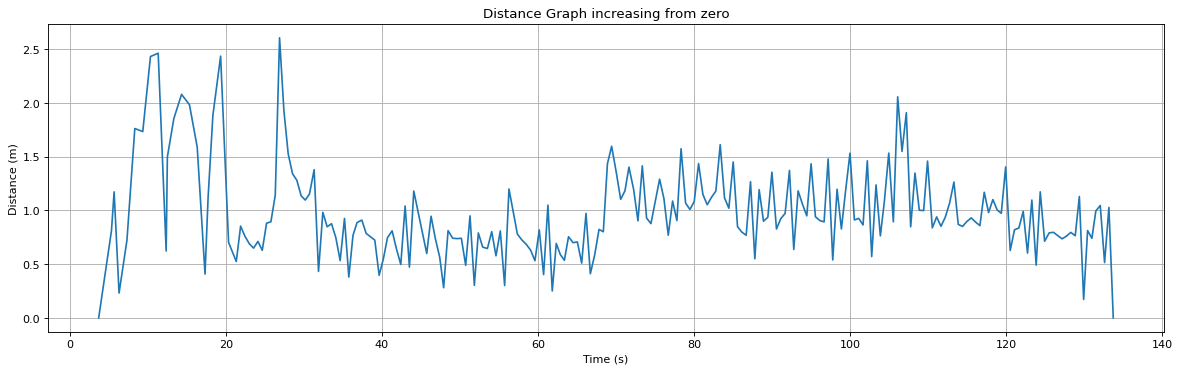

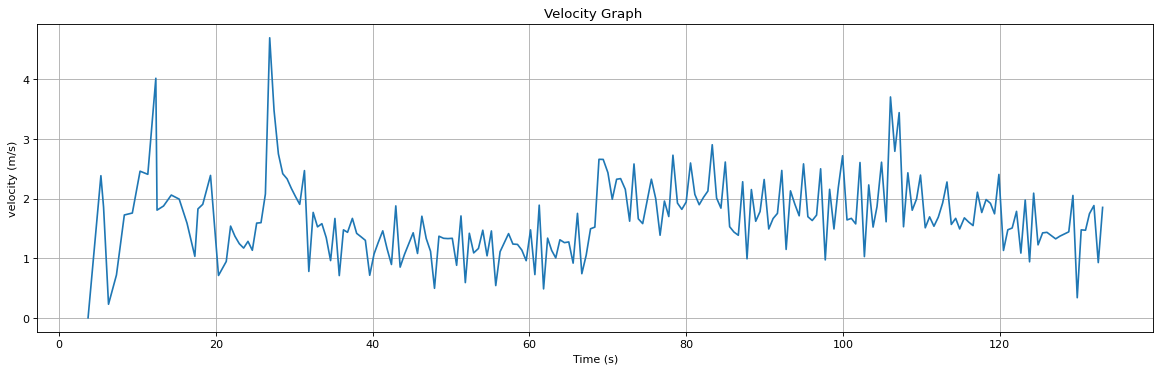